In [23]:
import sys
print(sys.version)

3.9.20 | packaged by conda-forge | (main, Sep 22 2024, 14:06:09) 
[Clang 17.0.6 ]


In [24]:
#install the library using pip is:"pip install pythainlp"
#install the library using pip is:"pip install pythainlp scikit-learn gensim matplotlib"
import pythainlp
from pythainlp.tokenize import word_tokenize
from collections import Counter
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

print(pythainlp.__version__)

5.0.4


In [25]:
# List of Thai articles
thai_articles = [
    "ฉันอยากมาอยู่ไทยแต่ไม่สามารถทำได้",
    "ประเทศไทยเป็นประเทศที่สวยงามมาก",
    "การเดินทางไปเชียงใหม่ทำให้ฉันมีความสุข",
    "ฉันอยากมาอยู่ไทยแต่ไม่สามารถทำได้",
    "ประเทศไทยเป็นประเทศที่สวยงามมาก",
    "การเดินทางไปเชียงใหม่ทำให้ฉันมีความสุข",
    "ฉันอยากมาอยู่ไทยแต่ไม่สามารถทำได้",
    "ประเทศไทยเป็นประเทศที่สวยงามมาก",
    "การเดินทางไปเชียงใหม่ทำให้ฉันมีความสุข",
    "ฉันอยากมาอยู่ไทยแต่ไม่สามารถทำได้",
    "ประเทศไทยเป็นประเทศที่สวยงามมาก",
    "การเดินทางไปเชียงใหม่ทำให้ฉันมีความสุข"
    
]

In [26]:
# Combine all articles into one string
all_text = " ".join(thai_articles)

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Count word frequencies
word_count = Counter(tokens)

# Find the most common words
most_common_words = word_count.most_common(5)  # Adjust the number as needed


In [27]:

# Print the most common words
print("Most mentioned words:")
for word, count in most_common_words:
    print(f"{word}: {count} times")

Most mentioned words:
 : 11 times
ฉัน: 8 times
ไทย: 8 times
ประเทศ: 8 times
อยาก: 4 times


/Users/yuta11/micromamba/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3593 (\N{THAI CHARACTER CHO CHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuta11/micromamba/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuta11/micromamba/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuta11/micromamba/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuta11/micromamba/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3607 (\N{THAI CHARACTER TH

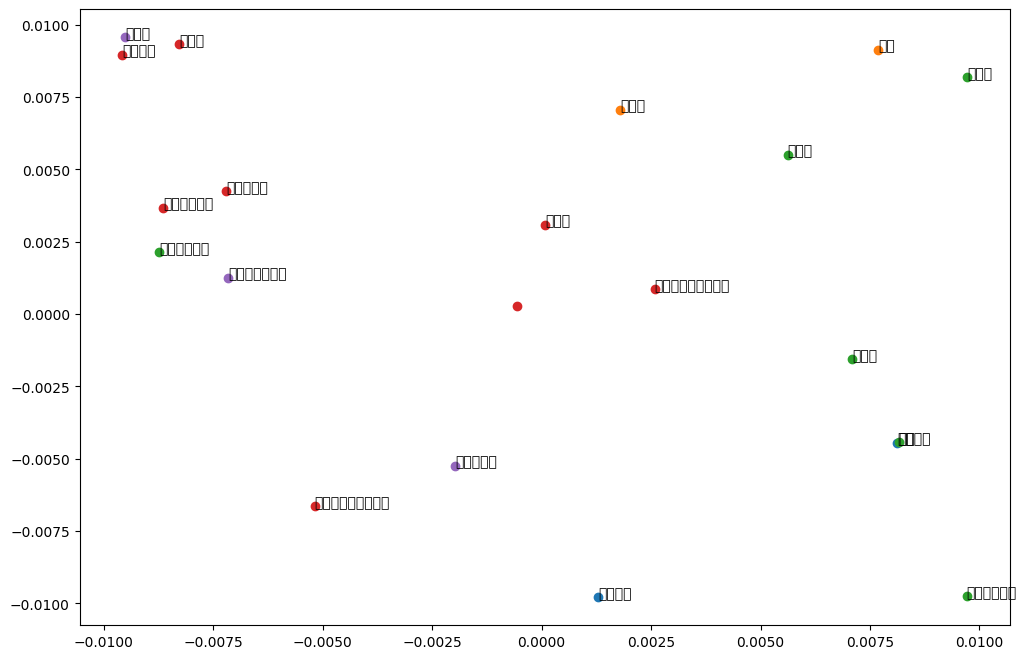

In [28]:
tokens = word_tokenize(most_common_words, engine='newmm')

# Tokenize the combined text
tokens = word_tokenize(all_text)

# Count word frequencies
word_counts = Counter(tokens)

# Get the most common words
most_common_words = word_counts.most_common(100)  # Adjust the number as needed

# Extract the words from most_common_words
words = [word for word, _ in most_common_words]

# Train Word2Vec model
model = Word2Vec([tokens], vector_size=100, window=5, min_count=1, workers=4)

# Get vectors for the most common words
word_vectors = np.array([model.wv[word] for word in words])

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust the number of clusters as needed
kmeans.fit(word_vectors)
labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors[i, 0], word_vectors[i, 1], c='C'+str(labels[i]))
    plt.annotate(word, (word_vectors[i, 0], word_vectors[i, 1]))
plt.show()